In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np

In [0]:
import pandas as pd

In [0]:
# import sys
# !{sys.executable} -m pip install pycbc lalsuite ligo-common --no-cache-dir

In [0]:
import pylab
import pycbc

In [0]:
from pycbc.filter import matched_filter

In [0]:
from pycbc.psd.analytical import AdVDesignSensitivityP1200087

In [0]:
signal_data=pd.read_excel('/content/drive/My Drive/Matching Matched Filtering/injection_data.xlsx', names=['mass1', 'mass2', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 'geocent_time'] )

In [0]:
distance_data=pd.read_excel('/content/drive/My Drive/Matching Matched Filtering/distance_injections.xlsx', names=['distance', 'SNR'] )

In [0]:
def get_data(data, dist):
    m1=data['mass1']
    m2=data['mass2']
    dec=data['dec']
    ra=data['ra']
    inclination=data['theta_jn']
    coa_phase=data['phase']
    pol_angle=data['psi']
    distance=dist['distance']
    return m1, m2, dec, ra, inclination, coa_phase, pol_angle, distance

In [0]:
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector

def get_signal(m1, m2, dec, ra, inclination, coa_phase, pol_angle, distance, delta_t, f_lower):
  apx = 'IMRPhenomD'
  hp, hc = get_td_waveform(approximant=apx,
                                 mass1=m1,
                                 mass2=m2,
                                 spin1z=0,
                                 delta_t=delta_t,
                                 distance=distance,
                                 inclination = inclination,
                                 coa_phase =  coa_phase,
                                 f_lower=f_lower)
  
  det_h1 = Detector('H1')
  signal = det_h1.project_wave(hp, hc, ra, dec, pol_angle)
  signal_peak_index=np.argmax(signal)

  return signal, signal_peak_index


In [0]:
def get_zoom(whiten, duration, signal_peak_index=None):
  
  if signal_peak_index==None:
    zoom=whiten.time_slice(0,1)
    return zoom
    # return zoom.data.reshape((8192, 1))

  max_index=signal_peak_index+2
  time_of_max=whiten.sample_times.data[max_index]
  start=duration-0.25
  end=duration-0.05
  instant=random.uniform(start, end)
  zoom = whiten.time_slice(time_of_max-instant, time_of_max+duration-instant)
  # # print (time_of_max)
  # if time_of_max>0.8:
    
  # elif time_of_max>0.6:
  #   zoom = whiten.time_slice(time_of_max-0.6, time_of_max+0.4)
  # return zoom.data.reshape((8192, 1))
  return zoom

In [0]:
import random

In [0]:
from pycbc import filter

In [0]:
index=3
m1, m2, dec, ra, inclination, coa_phase, pol_angle, distance=get_data(signal_data.loc[index], distance_data.loc[index])

In [0]:
m1, m2, 

(59.6160367922944, 32.9122657527105)

In [0]:
durations=[1, 1.5]
for i in range(len(durations)):
  signal, signal_peak_index=get_signal(m1, m2, dec, ra, inclination, coa_phase, pol_angle, distance, delta_t, f_lower)
  zoom=get_zoom(signal, durations[i], signal_peak_index)
  tlen = len(zoom)
  delta_f = 1.0 / zoom.duration
  flen = tlen//2 + 1
  psd=get_psd(flen, delta_f, f_lower)
  SNR=filter.matchedfilter.sigma(zoom, psd, low_frequency_cutoff=20)
  print ('For duration {}s, the SNR is {}'.format(durations[i], SNR))

For duration 1s, the SNR is 5.47580649834128
For duration 1.5s, the SNR is 5.4752132911939775


In [0]:
index=8
m1, m2, dec, ra, inclination, coa_phase, pol_angle, distance=get_data(signal_data.loc[index], distance_data.loc[index])

In [0]:
print (m1, m2)

33.2609619125822 8.60142202031759


In [0]:
durations=[1, 2, 4, 6]
for i in range(len(durations)):
  signal, signal_peak_index=get_signal(m1, m2, dec, ra, inclination, coa_phase, pol_angle, distance, delta_t, f_lower)
  zoom=get_zoom(signal, durations[i], signal_peak_index)
  tlen = len(zoom)
  delta_f = 1.0 / zoom.duration
  flen = tlen//2 + 1
  psd=get_psd(flen, delta_f, f_lower)
  SNR=filter.matchedfilter.sigma(zoom, psd, low_frequency_cutoff=20)
  print ('For duration {}s, the SNR is {}'.format(durations[i], SNR))


For duration 1s, the SNR is 5.118218829022667
For duration 2s, the SNR is 5.194376952716649
For duration 4s, the SNR is 5.200192704569924
For duration 6s, the SNR is 5.199993274240364


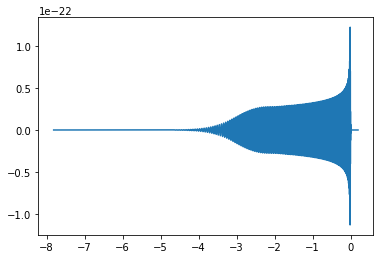

In [0]:
pylab.plot(signal.sample_times, signal)